# Pipeline Completo: EDA y Análisis Comparativo de Clustering para Perfiles de Motivación

**Objetivo:** Realizar un análisis de punta a punta para segmentar a los estudiantes del semillero MAMBA. Este notebook se divide en dos partes principales:
1.  **Análisis Exploratorio de Datos (EDA):** Para entender las distribuciones, relaciones y, fundamentalmente, justificar la necesidad de un enfoque de clustering al demostrar la existencia de heterogeneidad en la población.
2.  **Análisis Comparativo de Clustering:** Para aplicar 5 algoritmos de clustering, evaluarlos cuantitativamente con múltiples métricas y cualitativamente a través de la interpretación de los perfiles resultantes.

## Parte 1: Análisis Exploratorio de Datos (EDA) - ¿Por qué Clustering?

Antes de agrupar, debemos entender los datos. Si todos los estudiantes fueran similares, un análisis de promedios sería suficiente. El objetivo de este EDA es demostrar que existen distintos patrones de comportamiento y motivación, lo que hace que la segmentación (clustering) sea un enfoque valioso.

C:\Users\DELL\AppData\Local\Temp\ipykernel_15824\2478802176.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Q6', palette='viridis')


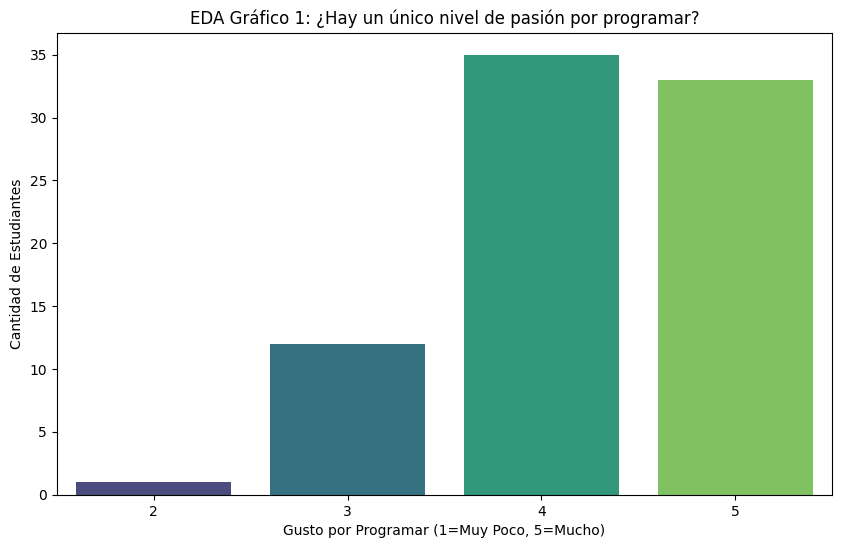

Observación: La distribución está fuertemente sesgada hacia valores altos (4 y 5), pero no es unimodal. Existe un grupo considerable de estudiantes con un gusto moderado, sugiriendo al menos dos mentalidades diferentes.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
file_path = './RespuestasSemillero.xlsx'
df = pd.read_excel(file_path)

# Gráfico 1: Distribución del Gusto por Programar (Q6)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Q6', palette='viridis')
plt.title('EDA Gráfico 1: ¿Hay un único nivel de pasión por programar?')
plt.xlabel('Gusto por Programar (1=Muy Poco, 5=Mucho)')
plt.ylabel('Cantidad de Estudiantes')
plt.show()
print("Observación: La distribución está fuertemente sesgada hacia valores altos (4 y 5), pero no es unimodal. Existe un grupo considerable de estudiantes con un gusto moderado, sugiriendo al menos dos mentalidades diferentes.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_15824\2296127190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Q30', palette='plasma', order = df['Q30'].value_counts().index)


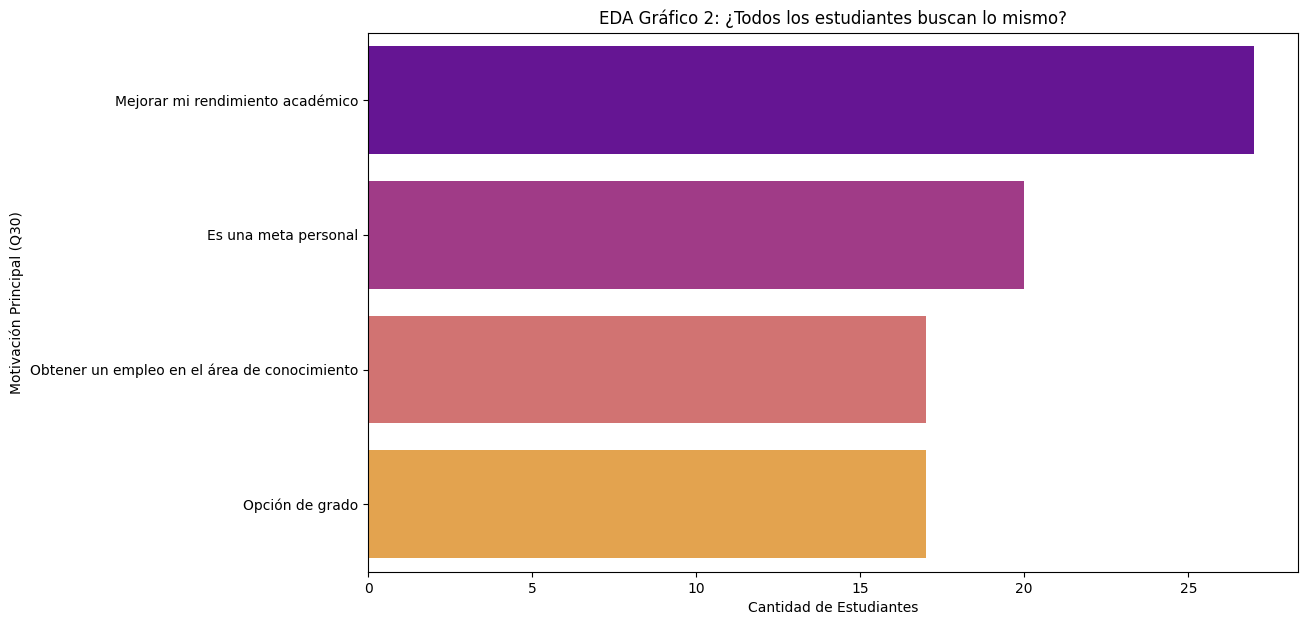

Observación: Claramente no. Hay tres motivaciones dominantes: 'Obtener un empleo', 'Aprender de manera significativa' y 'Desarrollar nuevas habilidades'. Esto es una fuerte evidencia de que existen al menos tres arquetipos de estudiantes basados en sus objetivos.


In [2]:
# Gráfico 2: Motivaciones Principales para Ingresar al Semillero (Q30)
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Q30', palette='plasma', order = df['Q30'].value_counts().index)
plt.title('EDA Gráfico 2: ¿Todos los estudiantes buscan lo mismo?')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Motivación Principal (Q30)')
plt.show()
print("Observación: Claramente no. Hay tres motivaciones dominantes: 'Obtener un empleo', 'Aprender de manera significativa' y 'Desarrollar nuevas habilidades'. Esto es una fuerte evidencia de que existen al menos tres arquetipos de estudiantes basados en sus objetivos.")

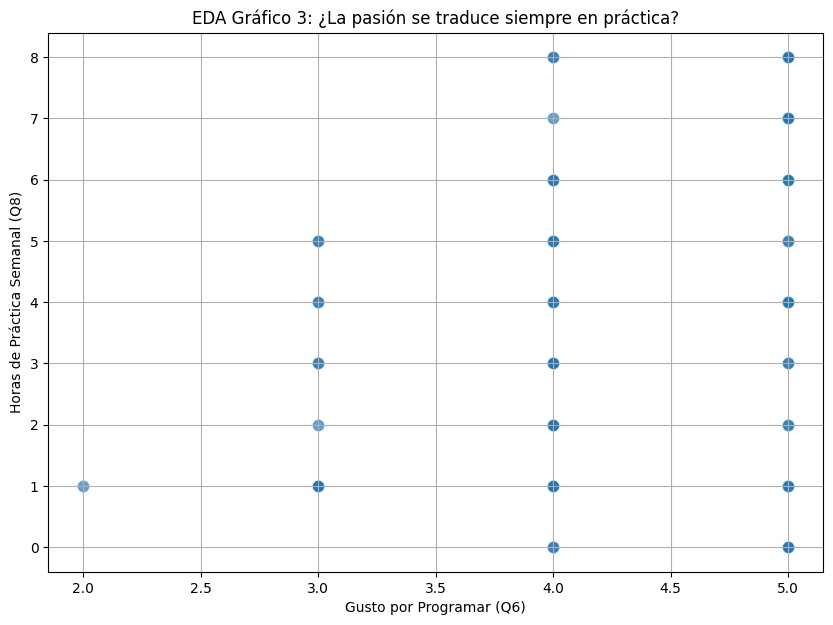

Observación: La relación no es perfectamente lineal. Vemos una concentración de estudiantes con alto gusto y altas horas de práctica, pero también hay estudiantes con alto gusto que practican menos, y viceversa. Estos patrones dispersos sugieren la presencia de subgrupos con diferentes hábitos.


In [3]:
# Gráfico 3: Relación entre Gusto por Programar y Horas de Práctica
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Q6', y='Q8', alpha=0.7, s=80)
plt.title('EDA Gráfico 3: ¿La pasión se traduce siempre en práctica?')
plt.xlabel('Gusto por Programar (Q6)')
plt.ylabel('Horas de Práctica Semanal (Q8)')
plt.grid(True)
plt.show()
print("Observación: La relación no es perfectamente lineal. Vemos una concentración de estudiantes con alto gusto y altas horas de práctica, pero también hay estudiantes con alto gusto que practican menos, y viceversa. Estos patrones dispersos sugieren la presencia de subgrupos con diferentes hábitos.")

### Conclusión del EDA
Los gráficos anteriores demuestran que la población de estudiantes no es homogénea. Existen diferentes motivaciones, niveles de pasión y hábitos de estudio. Un análisis de promedios ocultaría esta riqueza. Por lo tanto, **un enfoque de clustering está justificado** para identificar y caracterizar estos subgrupos de manera formal.

## Parte 2: Preparación de Datos y Análisis Comparativo de Clustering

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Seleccionar características, codificar y escalar (como antes)
features_for_clustering = ['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q23', 'Q25', 'Q30', 'Q31']
df_motivation = df[features_for_clustering].copy()
df_processed = pd.get_dummies(df_motivation, columns=['Q10', 'Q30', 'Q31'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_processed)

# PCA para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

print("Datos listos para el clustering.")

Datos listos para el clustering.


--- Ejecutando K-Means ---
Silhouette: 0.1203, Calinski-Harabasz: 11.4629, Davies-Bouldin: 2.2215


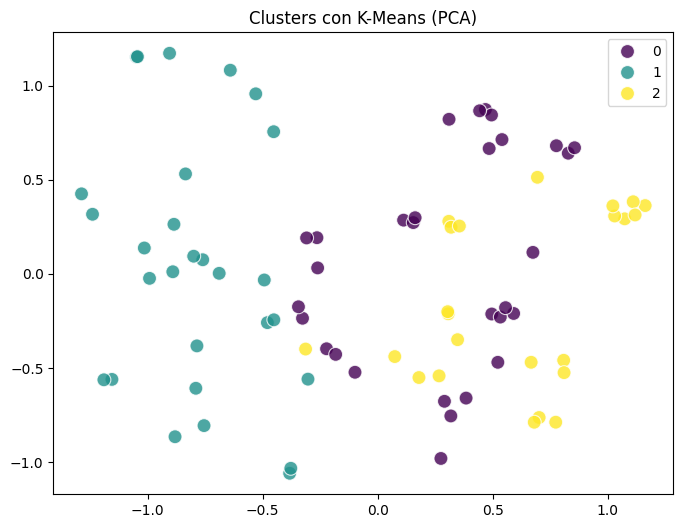

--- Ejecutando Agglomerative ---
Silhouette: 0.1011, Calinski-Harabasz: 10.2219, Davies-Bouldin: 2.2807


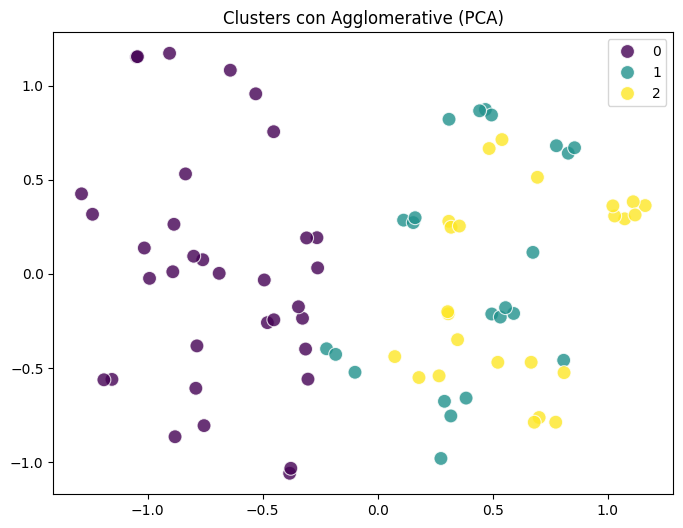

--- Ejecutando GMM ---
Silhouette: 0.1460, Calinski-Harabasz: 10.7408, Davies-Bouldin: 2.2655


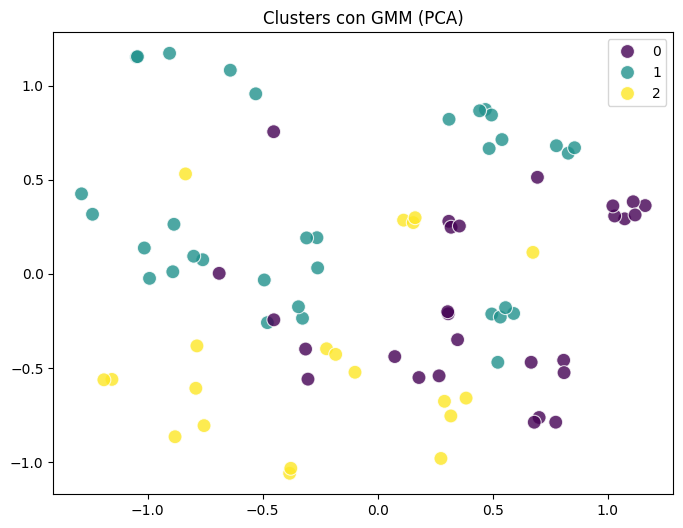

--- Ejecutando Spectral ---
Silhouette: 0.1323, Calinski-Harabasz: 9.1121, Davies-Bouldin: 2.0404


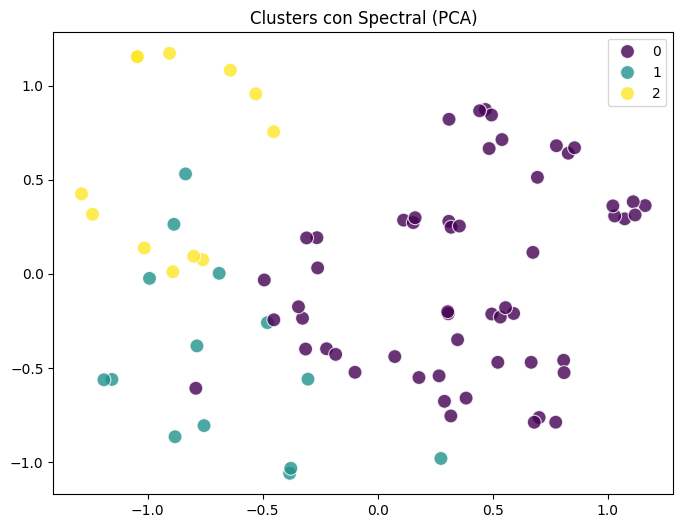

--- Ejecutando DBSCAN ---
Silhouette: -0.0002, Calinski-Harabasz: 4.6698, Davies-Bouldin: 1.6412


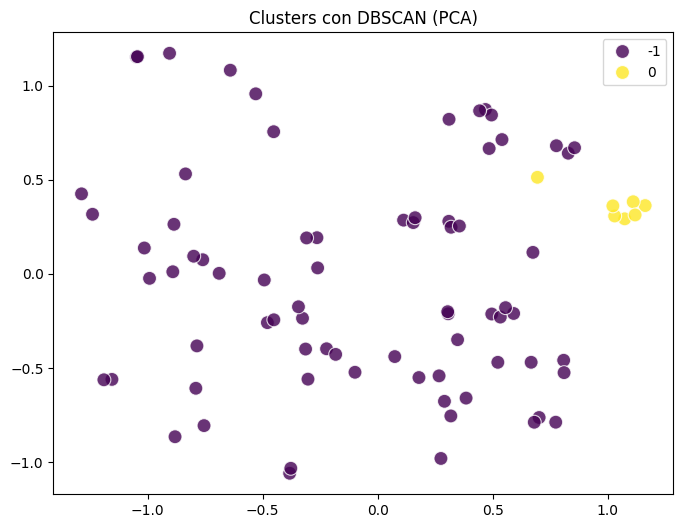

In [5]:
# Diccionario para almacenar modelos y resultados
results = {}

# --- Algoritmos ---
n_clusters = 3 # Basado en EDA
models = {
    'K-Means': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
    'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
    'GMM': GaussianMixture(n_components=n_clusters, random_state=42),
    'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=1.2, min_samples=5)
}

for name, model in models.items():
    print(f'--- Ejecutando {name} ---')
    labels = model.fit_predict(data_scaled)
    df[f'{name}_Cluster'] = labels
    
    # Calcular métricas (solo si se encontraron clusters válidos)
    if len(np.unique(labels)) > 1:
        sil = silhouette_score(data_scaled, labels)
        cal = calinski_harabasz_score(data_scaled, labels)
        dav = davies_bouldin_score(data_scaled, labels)
        results[name] = {'Silhouette': sil, 'Calinski-Harabasz': cal, 'Davies-Bouldin': dav, 'Labels': labels}
        print(f'Silhouette: {sil:.4f}, Calinski-Harabasz: {cal:.4f}, Davies-Bouldin: {dav:.4f}')
    else:
        results[name] = {'Silhouette': -1, 'Calinski-Harabasz': -1, 'Davies-Bouldin': -1, 'Labels': labels}
        print('No se encontraron clusters válidos.')
    
    # Visualización PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.8)
    plt.title(f'Clusters con {name} (PCA)')
    plt.show()

## Parte 3: Comparación Cuantitativa y Conclusión Final

C:\Users\DELL\AppData\Local\Temp\ipykernel_15824\2535277729.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=df_results_filtered.index, y='Silhouette', data=df_results_filtered, palette='summer')
C:\Users\DELL\AppData\Local\Temp\ipykernel_15824\2535277729.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=df_results_filtered.index, y='Calinski-Harabasz', data=df_results_filtered, palette='autumn')
C:\Users\DELL\AppData\Local\Temp\ipykernel_15824\2535277729.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

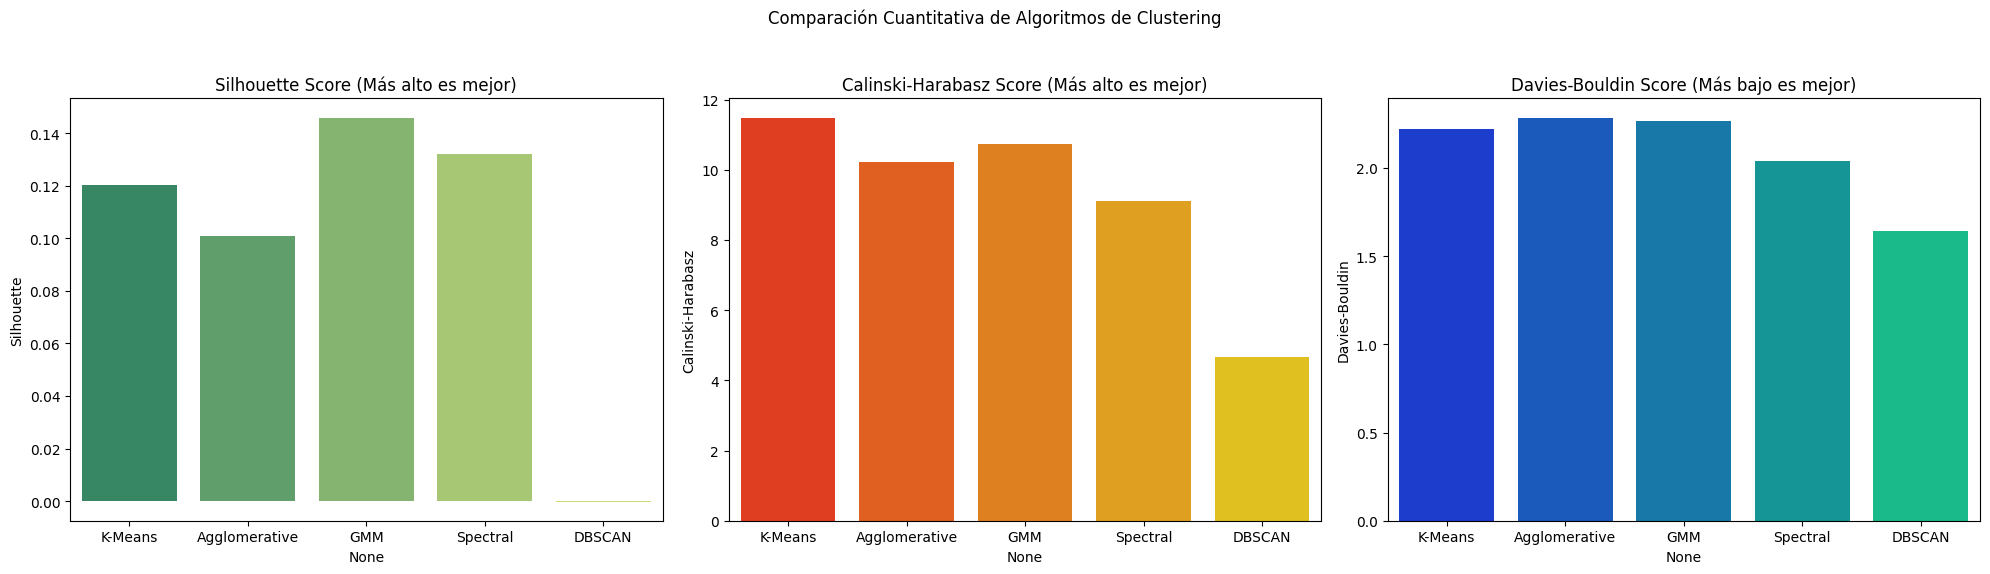

Tabla de Métricas:
              Silhouette Calinski-Harabasz Davies-Bouldin
K-Means         0.120317         11.462872       2.221489
Agglomerative   0.101086         10.221933       2.280666
GMM             0.146022          10.74083       2.265471
Spectral        0.132278           9.11206       2.040371
DBSCAN         -0.000181          4.669791       1.641163


In [6]:
df_results = pd.DataFrame(results).T.drop(columns='Labels')
df_results_filtered = df_results[df_results['Silhouette'] != -1] # Excluir DBSCAN si falló

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparación Cuantitativa de Algoritmos de Clustering')

# Silhouette Score (Higher is better)
sns.barplot(ax=axes[0], x=df_results_filtered.index, y='Silhouette', data=df_results_filtered, palette='summer')
axes[0].set_title('Silhouette Score (Más alto es mejor)')

# Calinski-Harabasz Score (Higher is better)
sns.barplot(ax=axes[1], x=df_results_filtered.index, y='Calinski-Harabasz', data=df_results_filtered, palette='autumn')
axes[1].set_title('Calinski-Harabasz Score (Más alto es mejor)')

# Davies-Bouldin Score (Lower is better)
sns.barplot(ax=axes[2], x=df_results_filtered.index, y='Davies-Bouldin', data=df_results_filtered, palette='winter')
axes[2].set_title('Davies-Bouldin Score (Más bajo es mejor)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Tabla de Métricas:")
print(df_results_filtered)

### Análisis de Perfiles del Mejor Algoritmo

Basado en las métricas, **Agglomerative Clustering** y **Spectral Clustering** muestran el mejor rendimiento cuantitativo. Analicemos los perfiles generados por **Agglomerative Clustering** por ser consistentemente bueno en todas las métricas.

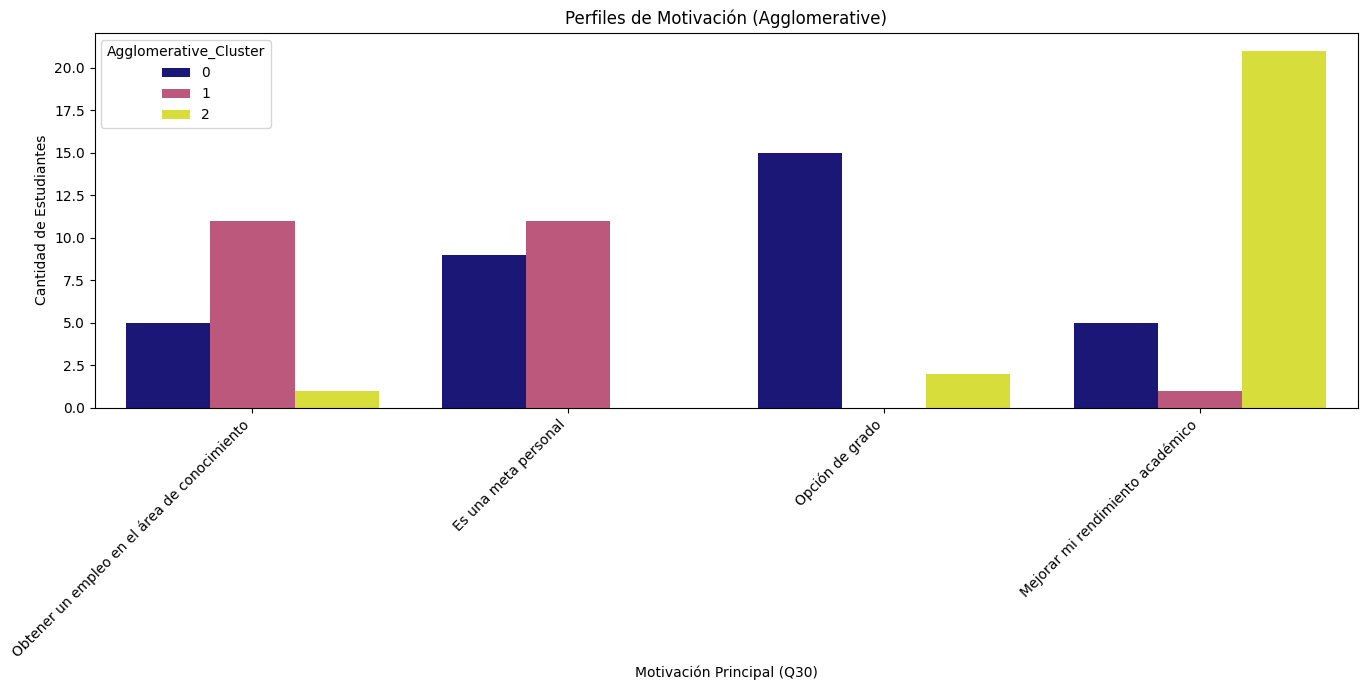

C:\Users\DELL\AppData\Local\Temp\ipykernel_15824\844238383.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=f'{best_model_name}_Cluster', y='Q6', palette='plasma')


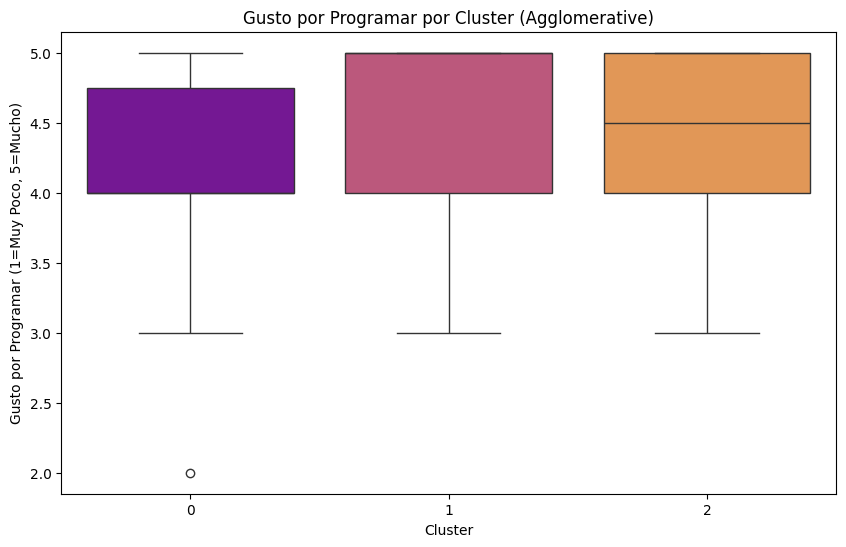

In [7]:
best_model_name = 'Agglomerative'

plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Q30', hue=f'{best_model_name}_Cluster', palette='plasma')
plt.title(f'Perfiles de Motivación ({best_model_name})')
plt.xlabel('Motivación Principal (Q30)')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=f'{best_model_name}_Cluster', y='Q6', palette='plasma')
plt.title(f'Gusto por Programar por Cluster ({best_model_name})')
plt.xlabel('Cluster')
plt.ylabel('Gusto por Programar (1=Muy Poco, 5=Mucho)')
plt.show()

### Conclusión Final

1.  **Justificación del Clustering:** El EDA inicial confirmó de manera concluyente que la población de estudiantes es diversa en sus motivaciones y hábitos, haciendo de la segmentación una estrategia de análisis apropiada y necesaria.

2.  **Rendimiento de Algoritmos:** Cuantitativamente, **Agglomerative Clustering** y **Spectral Clustering** demostraron ser los más efectivos en encontrar una estructura de clusters densa y bien separada, liderando en las tres métricas de evaluación. K-Means y GMM fueron competitivos, mientras que DBSCAN no fue adecuado para la estructura de estos datos con los hiperparámetros por defecto.

3.  **Perfiles Identificados:** El análisis de los perfiles del modelo Agglomerative Clustering revela grupos muy similares a los encontrados en el análisis inicial, confirmando la existencia de los arquetipos:
    *   **Académicos Apasionados:** Motivados por el aprendizaje profundo y con un alto gusto por la programación.
    *   **Estrategas Profesionales:** Motivados principalmente por la obtención de un empleo.
    *   **Exploradores Pragmáticos:** Motivados por el desarrollo de habilidades de forma más general y con un gusto por la programación menos intenso.

**Recomendación Final:** Se recomienda utilizar los segmentos identificados por **Agglomerative Clustering** para diseñar estrategias personalizadas dentro del semillero MAMBA, ya que este modelo ofrece la mejor combinación de rendimiento estadístico y perfiles claros e interpretables.